In [1]:
#### titanic dataset

# Data Dictionary

https://www.kaggle.com/competitions/titanic/data

survival: Survival ==> 0 = No, 1 = Yes

pclass:	Ticket class ==> 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex	

Age: Age in years	

sibsp: # of siblings / spouses aboard the Titanic	

parch: # of parents / children aboard the Titanic	

ticket: Ticket number	

fare: Passenger fare	

cabin: Cabin number	

embarked: Port of Embarkation ==> C = Cherbourg, Q = Queenstown, S = Southampton

## pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower


age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
#### work

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

In [4]:
t = pd.read_csv("train.csv")

t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# NaNs present in: Age, Cabin and Embarked

# regarding data types: all good for now

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

## Gender / sex

In [7]:
# with value counts and %

round(t["Sex"].value_counts(normalize = True) * 100, 2)

male      64.76
female    35.24
Name: Sex, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

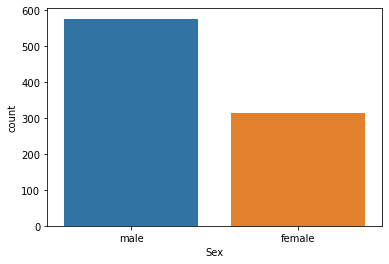

In [8]:
# with seaborn and countplot

sns.countplot(data = t, x = "Sex")

<AxesSubplot:>

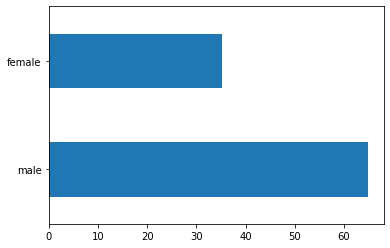

In [9]:
# on value counts and pandas.plot.bar()

round(t["Sex"].value_counts(normalize = True) * 100, 2).plot(kind = "barh")

In [10]:
# Male more (67.76%)

## Pclass

In [11]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

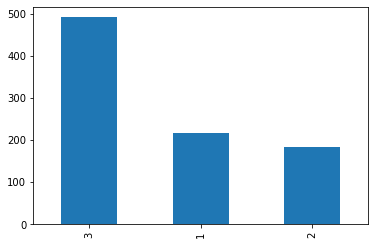

In [12]:
# with pandas

t["Pclass"].value_counts().sort_values(ascending = False).plot.bar()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

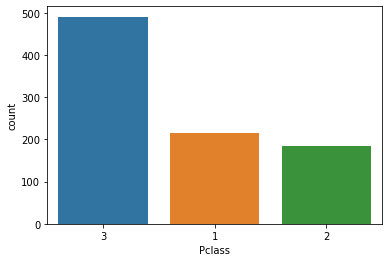

In [13]:
# with seaborn

sns.countplot(data = t, x = "Pclass", order = t["Pclass"].value_counts().index)

## Sex across classes

<AxesSubplot:xlabel='Pclass', ylabel='count'>

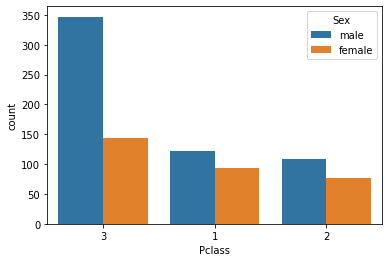

In [14]:
sns.countplot(data = t, x = "Pclass", hue = "Sex", order = t["Pclass"].value_counts().index)

In [15]:
# within a 3rd class we have 2x more males

## Split between males, females and children

In [16]:
# difference between adults and children

# difference between males, females and children

In [17]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
t["Age"].hasnans

True

In [19]:
# 184 NaNs for the Age...

In [20]:
# custom function

In [21]:
def persons(c):
    
    age = c[5]
    sex = c[4]
    
    if age <= 16:
        
        return("child")
    
    else:
        
        return(sex)

In [22]:
t["Persons"] = t.apply(persons, axis = 1)

In [23]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<AxesSubplot:xlabel='Pclass', ylabel='count'>

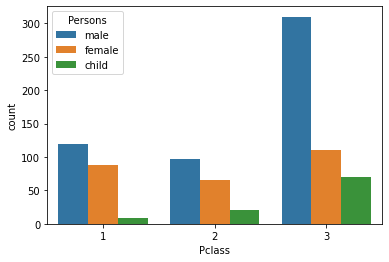

In [24]:
sns.countplot(data = t, x = "Pclass", hue = "Persons")

In [25]:
t["Person_category"] = t["Age"].apply(lambda x: "child" if x < 16 else "adult")

In [26]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,adult


<AxesSubplot:xlabel='Person_category', ylabel='count'>

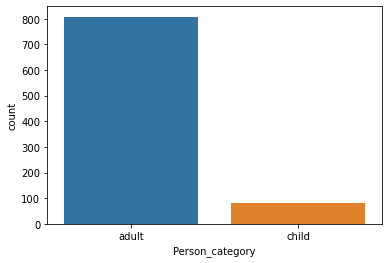

In [27]:
sns.countplot(data = t, x = "Person_category")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

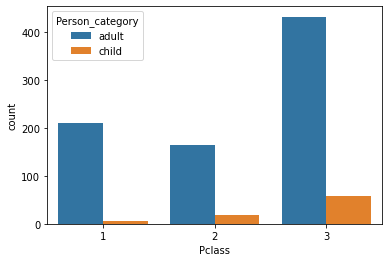

In [28]:
sns.countplot(data = t, x = "Pclass", hue = "Person_category")

In [29]:
# in 3rd class there is a lowest number of kids (children)

## Ages

<AxesSubplot:ylabel='Frequency'>

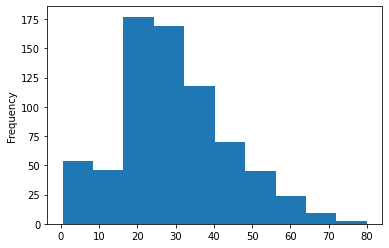

In [30]:
t["Age"].plot(kind = "hist")

<AxesSubplot:xlabel='Age', ylabel='Count'>

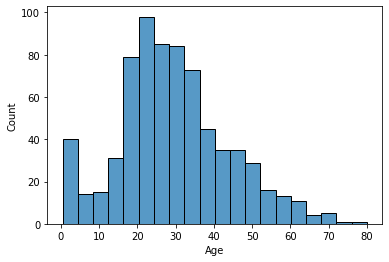

In [31]:
sns.histplot(data = t, x = "Age")

In [32]:
# ages within gender

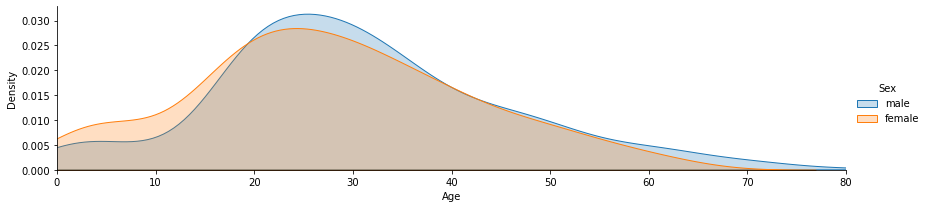

In [33]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(t, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = t['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

<AxesSubplot:xlabel='Age', ylabel='Count'>

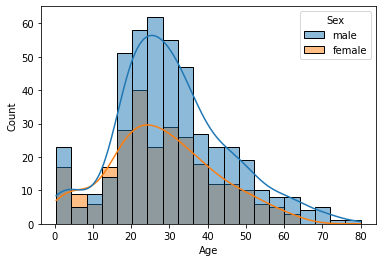

In [34]:
sns.histplot(data = t, x = "Age", hue = "Sex", kde = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

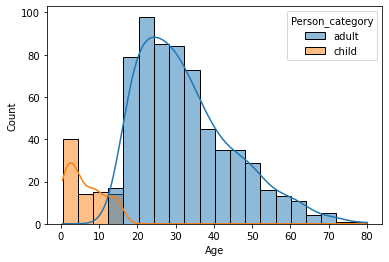

In [35]:
sns.histplot(data = t, x = "Age", hue = "Person_category", kde = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

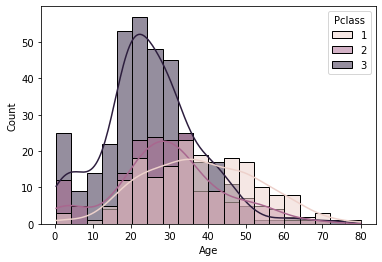

In [36]:
sns.histplot(data = t, x = "Age", hue = "Pclass", kde = True)

## Deck

In [37]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,adult


In [38]:
t["Cabin"].hasnans

True

In [39]:
t[t["Cabin"].isnull()].count()["PassengerId"]

687

In [40]:
# 687 rows with NaN for a Cabin

In [41]:
tc = t.copy()

tc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,adult


In [42]:
tc.dropna(subset = "Cabin", inplace = True)

In [43]:
tc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,adult
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,adult


In [44]:
# we need to extract letters from a cabin column

In [45]:
tc["Cabin_l"] = tc["Cabin"].apply(lambda x: x[0])

In [46]:
tc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category,Cabin_l
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,adult,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,adult,C


<AxesSubplot:xlabel='Cabin_l', ylabel='count'>

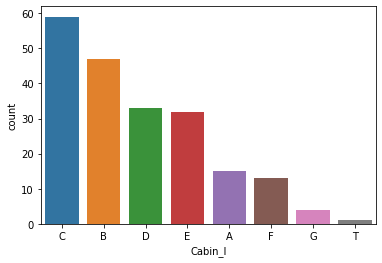

In [47]:
sns.countplot(data = tc, x = "Cabin_l", order = tc["Cabin_l"].value_counts().index)

<AxesSubplot:>

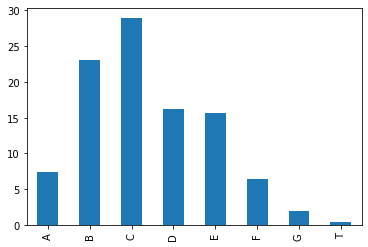

In [48]:
round(tc["Cabin_l"].value_counts(normalize = True) * 100, 2).sort_index().plot.bar()

In [49]:
tc[tc["Cabin_l"] == "T"].count()["PassengerId"]

1

In [50]:
# this is not good T cabin is the only one - drop it

In [51]:
tc = tc.drop(tc[tc["Cabin_l"] == "T"].index)

In [52]:
tc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category,Cabin_l
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,adult,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,adult,C


In [53]:
tc[tc["Cabin_l"] == "T"].count()["PassengerId"]

0

In [54]:
# cool we dont have any more a T cabin

<AxesSubplot:xlabel='Cabin_l', ylabel='count'>

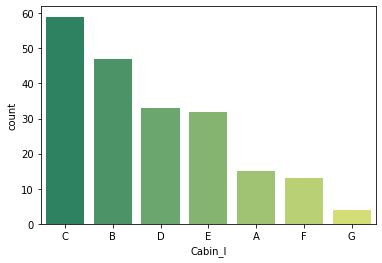

In [55]:
sns.countplot(data = tc, x = "Cabin_l", palette = "summer", order = tc["Cabin_l"].value_counts().index)

In [56]:
# cabin C is the winner most people were there

## Passengers origin

In [57]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,adult


<AxesSubplot:xlabel='Embarked', ylabel='count'>

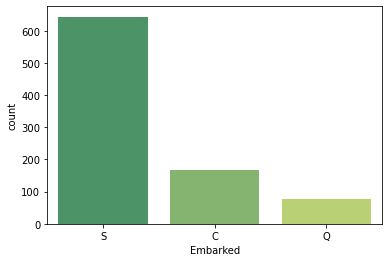

In [58]:
sns.countplot(data = t, x = "Embarked", palette = "summer")

In [59]:
round(t["Embarked"].value_counts(normalize = True) * 100, 2).sort_values(ascending = False)

S    72.44
C    18.90
Q     8.66
Name: Embarked, dtype: float64

<AxesSubplot:>

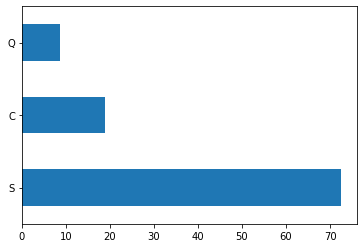

In [60]:
round(t["Embarked"].value_counts(normalize = True) * 100, 2).sort_values(ascending = False).plot(kind = "barh")

In [61]:
t.groupby(by = "Embarked").sum()["Survived"].sort_values(ascending = False)

Embarked
S    217
C     93
Q     30
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

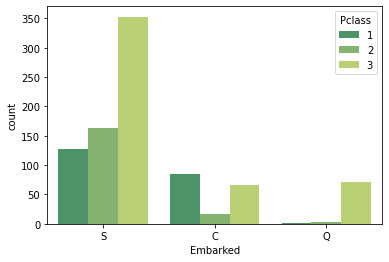

In [62]:
sns.countplot(data = t,
              x = "Embarked",
              hue = "Pclass",
              palette = "summer",
              order = t["Embarked"].value_counts().index,
              hue_order = [1,2,3])

In [63]:
# from S = Southampton we have the most passengers

In [64]:
# also Q location has only the 3rd class

## Who was alone and who with a family

In [65]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,adult


In [66]:
def alone(p):
    
    sib, par = p[6], p[7]
    
    if sib + par == 0:
        
        return("Yes")
    
    else:
        
        return("No")

In [67]:
t["Alone"] = t.apply(alone, axis = 1)

In [68]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,adult,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,adult,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,adult,Yes


<AxesSubplot:xlabel='Alone', ylabel='count'>

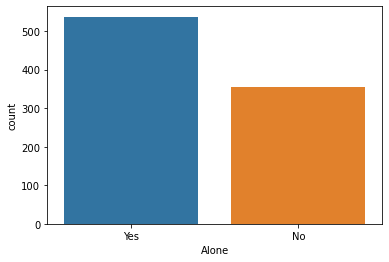

In [69]:
sns.countplot(data = t, x = "Alone", order = ["Yes", "No"])

<AxesSubplot:xlabel='Alone', ylabel='Percent'>

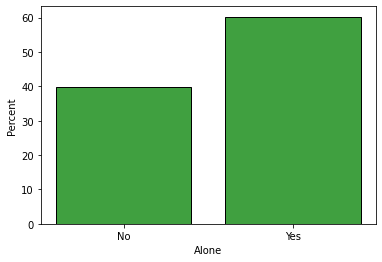

In [70]:
sns.histplot(data = t, x = "Alone", stat = "percent", shrink = 0.8, color = "green")

## Survivors

In [71]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,adult,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,adult,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,adult,Yes


In [72]:
# change 0 to No and 1 to Yes

In [73]:
t["Survived"] = t["Survived"].apply(lambda x: "Yes" if x == 1 else "No")

In [74]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category,Alone
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,adult,No
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult,No
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,adult,Yes
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult,No
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,adult,Yes


<AxesSubplot:xlabel='Survived', ylabel='Percent'>

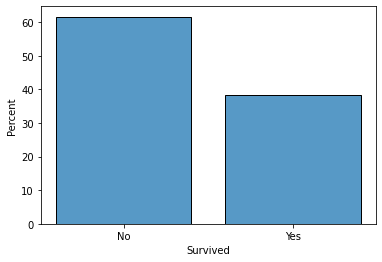

In [75]:
sns.histplot(data = t, x = "Survived", stat = "percent", shrink = 0.8)

<AxesSubplot:xlabel='Survived', ylabel='Percent'>

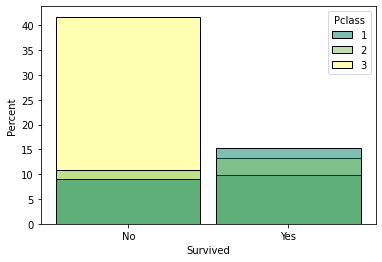

In [76]:
sns.histplot(data = t, x = "Survived", hue = "Pclass", stat = "percent", shrink = 0.9, palette = "summer")

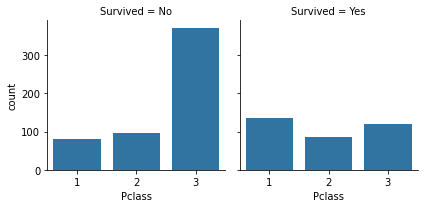

In [77]:
g = sns.FacetGrid(data = t, col = "Survived")

g.map(sns.countplot, "Pclass", order = [1, 2, 3])

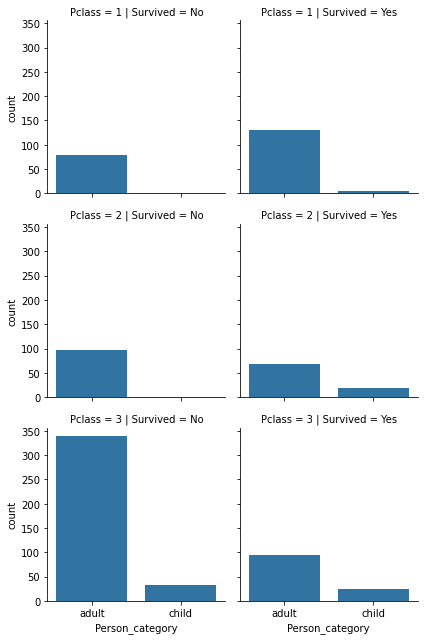

In [78]:
g = sns.FacetGrid(data = t, col = "Survived", row = "Pclass")

g.map(sns.countplot, "Person_category", order = ["adult", "child"])

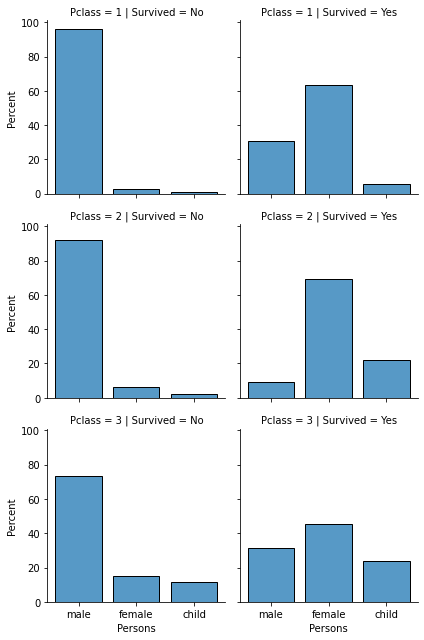

In [79]:
g = sns.FacetGrid(data = t, col = "Survived", row = "Pclass")

g.map(sns.histplot, "Persons", stat = "percent", shrink = 0.8)

In [80]:
# 3rd class the worst, most deaths

# males in every case

# most survived females

# most survived from 1st class

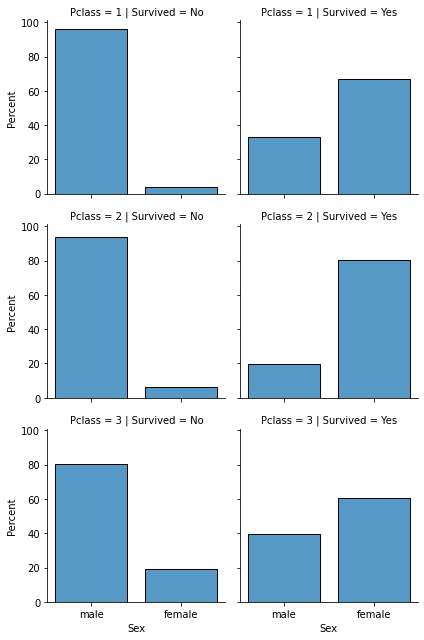

In [81]:
g = sns.FacetGrid(data = t, col = "Survived", row = "Pclass")

g.map(sns.histplot, "Sex", stat = "percent", shrink = 0.8)

In [82]:
## age, class and survived

In [83]:
t["Age"].max()

80.0

In [84]:
g = [10,20,40,60,80]

In [85]:
t["Survived"] = t["Survived"].apply(lambda x: 1 if x == "Yes" else 0)

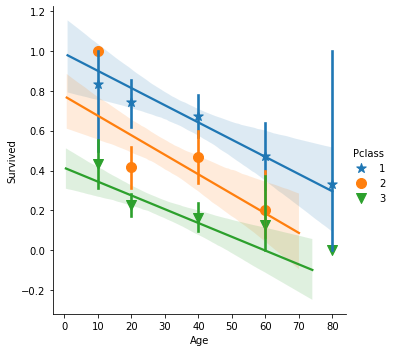

In [86]:
sns.lmplot(data = t, x = "Age", y = "Survived", hue = "Pclass", x_bins = g, markers=["*", "o", "v"], scatter_kws={"s":100})

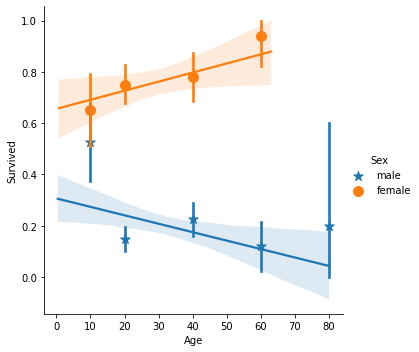

In [87]:
sns.lmplot(data = t, x = "Age", y = "Survived", hue = "Sex", x_bins = g, markers=["*", "o"], scatter_kws={"s":100})

In [88]:
t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Persons,Person_category,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,adult,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,adult,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,adult,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,adult,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,adult,Yes


In [89]:
len(t[t["Age"] > 60.0])

22

In [90]:
t[t["Age"] > 60.0].count()["PassengerId"]

22

In [91]:
t[t["Age"] > 60.0]["Pclass"].value_counts()

1    14
3     5
2     3
Name: Pclass, dtype: int64

In [92]:
t[t["Age"] > 60.0][["Survived", "PassengerId"]].groupby(by = "Survived").count().reset_index()

,Survived,PassengerId
0,0,17
1,1,5


In [93]:
# end